In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from dentate.plot import clean_axes

('dentate.plot: problem importing module required by dentate.spikedata:', ImportError('No module named pathos.multiprocessing',))
('dentate.stimulus: problem importing rbf module:', ImportError('No module named rbf',))
('dentate.plot: problem importing module required by dentate.stimulus:', ImportError('No module named rbf',))
('dentate.plot: problem importing module required by dentate.geometry:', ImportError('No module named rbf',))


In [3]:
p_width = 2./3
field_width_params = [35.0,   0.32]  # slope, tau

In [21]:
positions = np.linspace(0, 1, 1000)
offsets = np.linspace(0, 1, 10)
field_width = lambda x: 40. + field_width_params[0] * (np.exp(x / field_width_params[1]) - 1.)
widths = [field_width(x) for x in offsets]
p_module = lambda width, offset: lambda x: np.exp(-((x - offset) / (width / 3. / np.sqrt(2.))) ** 2.)
p_modules = [p_module(p_width, offset)(positions) for offset in offsets]
p_sum = np.sum(p_modules, axis=0)
# expected_width = np.array(widths).dot(np.divide(p_modules, p_sum))
expected_width = np.multiply(widths, np.transpose(p_modules / p_sum))
mean_expected_width = np.sum(expected_width, axis=1)

In [22]:
print mean_expected_width.shape

(1000,)


<IPython.core.display.Javascript object>


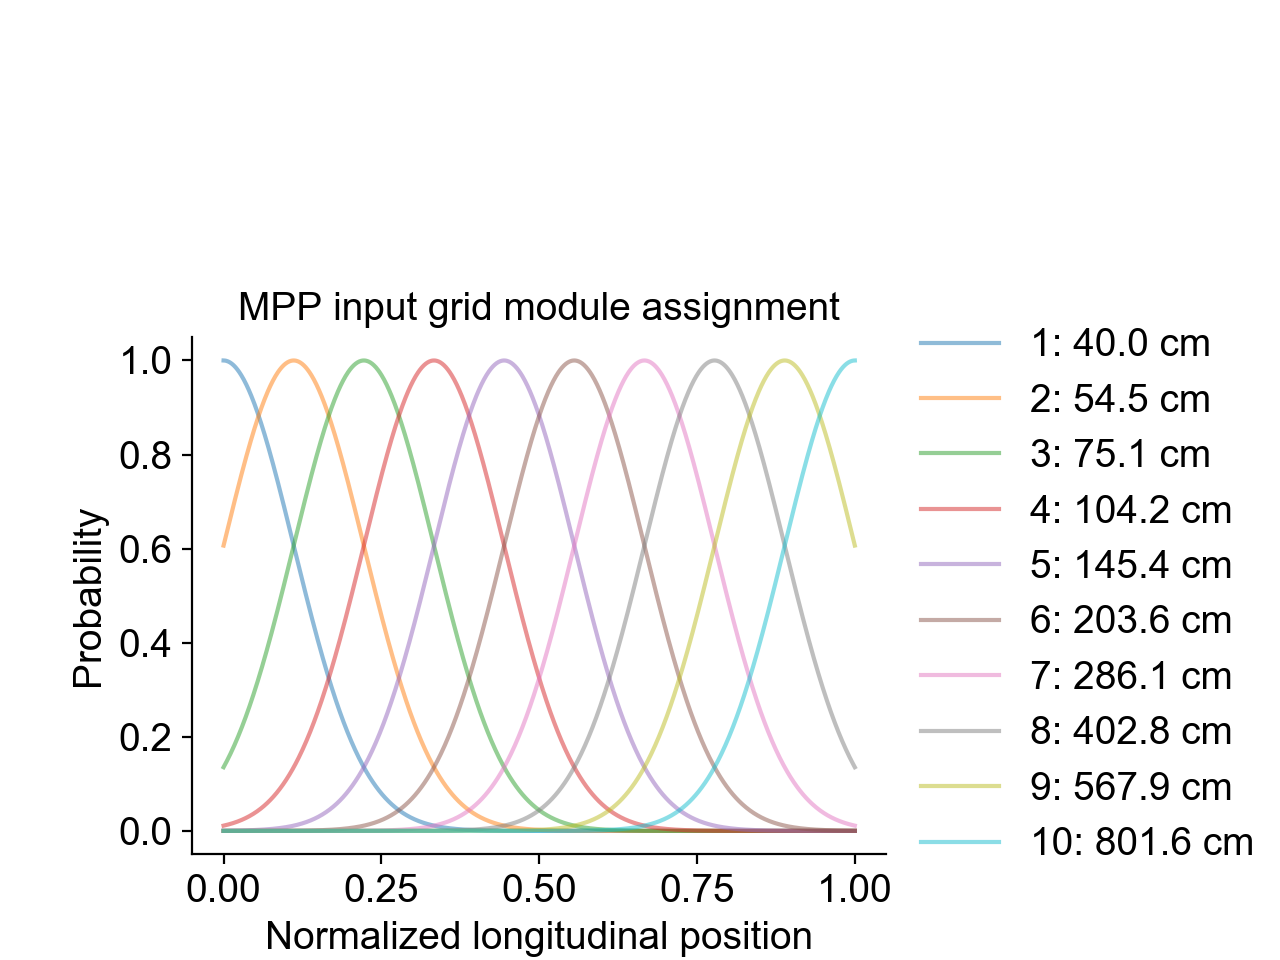

<IPython.core.display.Javascript object>


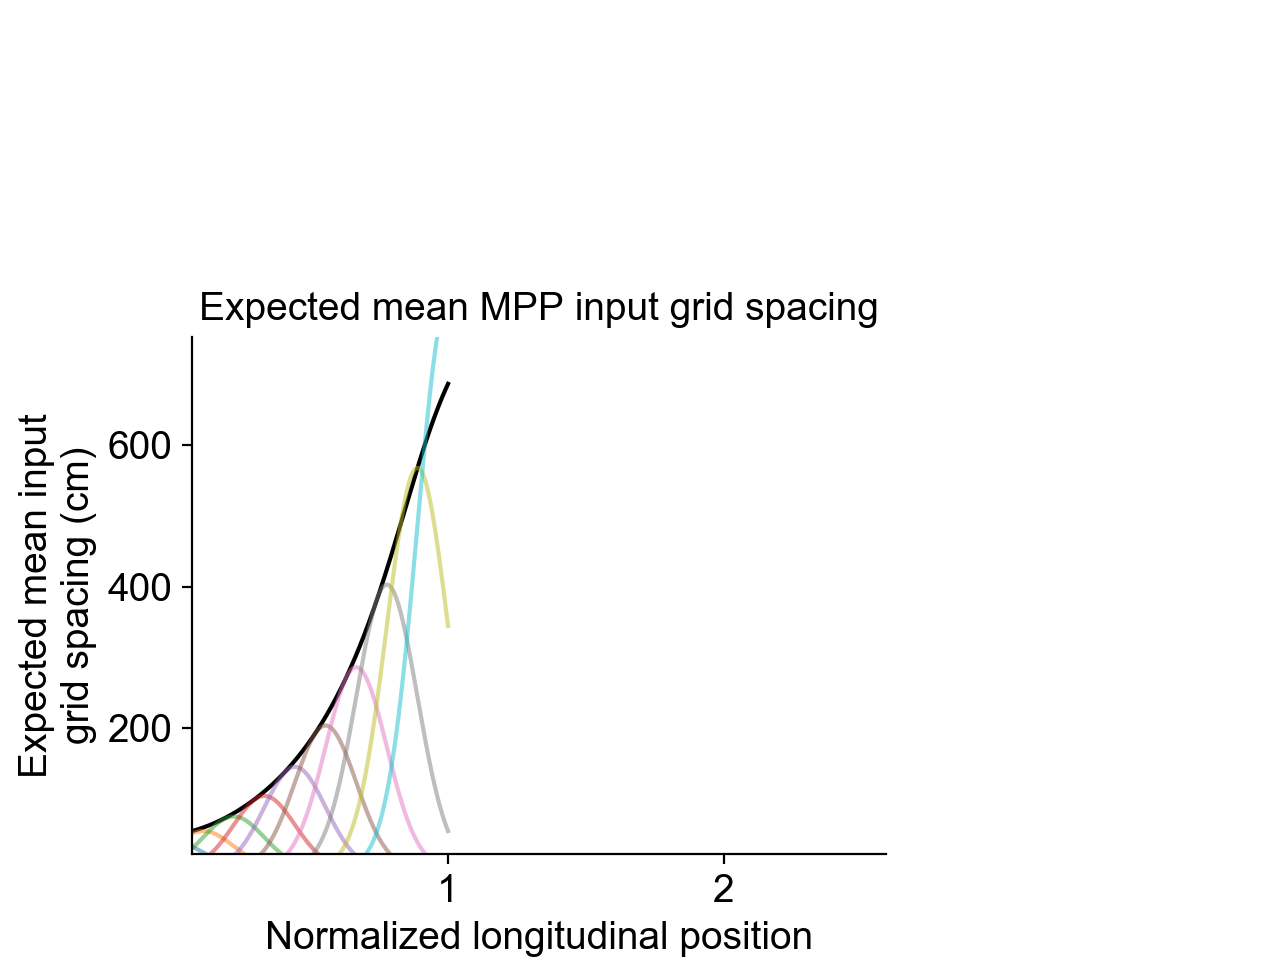

In [25]:
fig1, axes1 = plt.subplots()
fig2, axes2 = plt.subplots()

for i, (this_p, this_width) in enumerate(zip(p_modules, widths)):
    # axes1.plot(positions, this_p / p_sum, label='%i: %.1f cm' % (i + 1, this_width), alpha=0.5)
    axes1.plot(positions, this_p, label='%i: %.1f cm' % (i + 1, this_width), alpha=0.5)
    axes2.plot(positions, this_p * this_width, alpha=0.5)
axes2.plot(positions, mean_expected_width, c='k', zorder=0)
axes1.set_ylabel('Probability')
axes1.set_xlabel('Normalized longitudinal position')
box1 = axes1.get_position()
axes1.set_position([box1.x0 + 0.025, box1.y0, box1.width * 0.7, box1.height * 0.7])
axes2.set_position([box1.x0 + 0.025, box1.y0, box1.width * 0.7, box1.height * 0.7])
axes1.legend(loc='center left', frameon=False, framealpha=0.5, bbox_to_anchor=(1, 0.5))
axes2.set_ylabel('Expected mean input\ngrid spacing (cm)')
axes2.set_xlabel('Normalized longitudinal position')
axes1.set_title('MPP input grid module assignment', fontsize=mpl.rcParams['font.size'])
axes2.set_title('Expected mean MPP input grid spacing', fontsize=mpl.rcParams['font.size'])
clean_axes([axes1, axes2])
# fig1.tight_layout()
# fig2.tight_layout()

fig1.show()
fig2.show()